<a href="https://colab.research.google.com/github/Neelaveninethra/Classification_of_indian_food_using_Deep_Learning/blob/main/classification_of_indian_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow numpy matplotlib scikit-learn opencv-python


In [3]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [44]:
import os

os.listdir('/content/drive/MyDrive/')


['IMG-20221025-WA0009 (1).jpg',
 'IMG-20221025-WA0009.jpg',
 'mmmm.jpg',
 'Colab Notebooks',
 'Screenshot_2025-04-15-16-21-17-94_944a2809ea1b4cda6ef12d1db9048ed3.jpg',
 'IMG_20250517_143127.jpg',
 'gfg-c.pdf',
 'anna_achievement.pdf',
 'stop1 (2).pdf',
 'stop1 (1).pdf',
 'stop1.pdf',
 'IMG_20250714_090744.jpg',
 'id_front.jpg',
 'id_b.jpg',
 'mf.jpg',
 'IBM_22691A3268.pdf',
 'NR3 (1).pdf',
 'NR3.pdf',
 't13 (2).pdf',
 't13 (1).pdf',
 'Neelaveni_planys.pdf',
 't13.pdf',
 'neelu.jpeg',
 'st.pdf (1).pdf',
 '22691A3268-PS.pdf',
 '22691A3268-MIS.pdf',
 'Indian_food_dataset',
 'south_indian_food_classifier.h5',
 'indian_food_classifier.h5',
 'Paper_Images']

In [45]:
os.listdir('/content/drive/MyDrive/Indian_food_dataset')


['raw_images', 'train', 'validation', 'test']

In [46]:
import os

raw_dir = "/content/drive/MyDrive/Indian_food_dataset/raw_images"
print(os.listdir(raw_dir))


['vada', 'upma', 'dosa', 'poori', 'uggani', 'idli', 'chicken_biriyani']


In [47]:
base_dir = "/content/drive/MyDrive/Indian_food_dataset"

In [48]:
train_dir = os.path.join(base_dir, "train")

In [49]:
val_dir = os.path.join(base_dir, "validation")

In [50]:
test_dir = os.path.join(base_dir, "test")

In [51]:
classes = ["idli", "dosa", "upma", "uggani", "poori", "chicken_biriyani", "vada"]

In [52]:
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)
print("Folders created successfully")


Folders created successfully


In [53]:
for cls in classes:
    cls_path = os.path.join(raw_dir, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    train_split = int(0.7 * len(images))
    val_split = int(0.85 * len(images))

    splits = {
        train_dir: images[:train_split],
        val_dir: images[train_split:val_split],
        test_dir: images[val_split:]
    }

    for split_dir, split_images in splits.items():
        class_dir = os.path.join(split_dir, cls)
        os.makedirs(class_dir, exist_ok=True)

        for img in split_images:
            src = os.path.join(cls_path, img)
            dst = os.path.join(class_dir, img)
            shutil.copy(src, dst)

print("Dataset successfully split")


Dataset successfully split


In [54]:
img_size = (224, 224)
batch_size = 16

In [56]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [57]:
val_test_gen = ImageDataGenerator(rescale=1./255)

In [58]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 348 images belonging to 7 classes.


In [59]:
val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 182 images belonging to 7 classes.


In [60]:
test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 205 images belonging to 7 classes.


In [62]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

In [63]:
base_model.trainable = False

In [64]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(7, activation="softmax")(x)

In [65]:
model = Model(inputs=base_model.input, outputs=output)

In [66]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [67]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5034 - loss: 1.4702 - val_accuracy: 0.8681 - val_loss: 0.3956
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - accuracy: 0.9175 - loss: 0.2810 - val_accuracy: 0.9451 - val_loss: 0.2070
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 425ms/step - accuracy: 0.9497 - loss: 0.1825 - val_accuracy: 0.9725 - val_loss: 0.1110
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - accuracy: 0.9833 - loss: 0.0876 - val_accuracy: 0.9780 - val_loss: 0.0698
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 480ms/step - accuracy: 0.9688 - loss: 0.0875 - val_accuracy: 0.9780 - val_loss: 0.0659
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 477ms/step - accuracy: 0.9921 - loss: 0.0587 - val_accuracy: 0.9945 - val_loss: 0.0316
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 434ms/step - accuracy: 0.9976 - loss: 0.0333 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 456ms/step - accuracy: 0.9992 - loss: 0.0225 - val_accuracy:

In [68]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9854 - loss: 0.0384
Test Accuracy: 0.995121955871582


In [71]:
print(f"Test Accuracy:{test_acc:.1%}")

Test Accuracy:99.5%


In [ ]:
model.save("/content/drive/MyDrive/indian_food_classifier.h5")


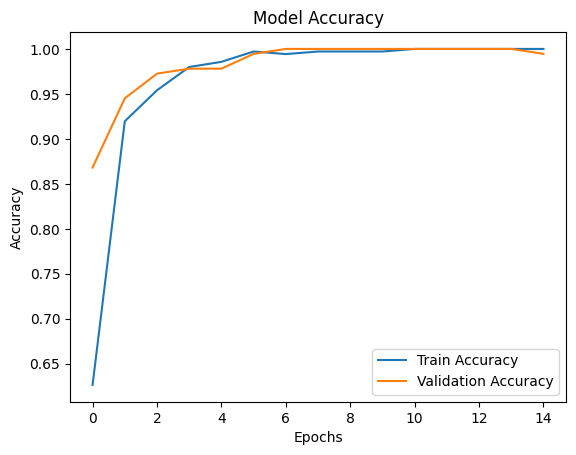

In [72]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


##Paper Images

In [33]:
paper_img_dir = "/content/drive/MyDrive/Paper_Images"
os.makedirs(paper_img_dir, exist_ok=True)
print("Paper image folder created")


Paper image folder created


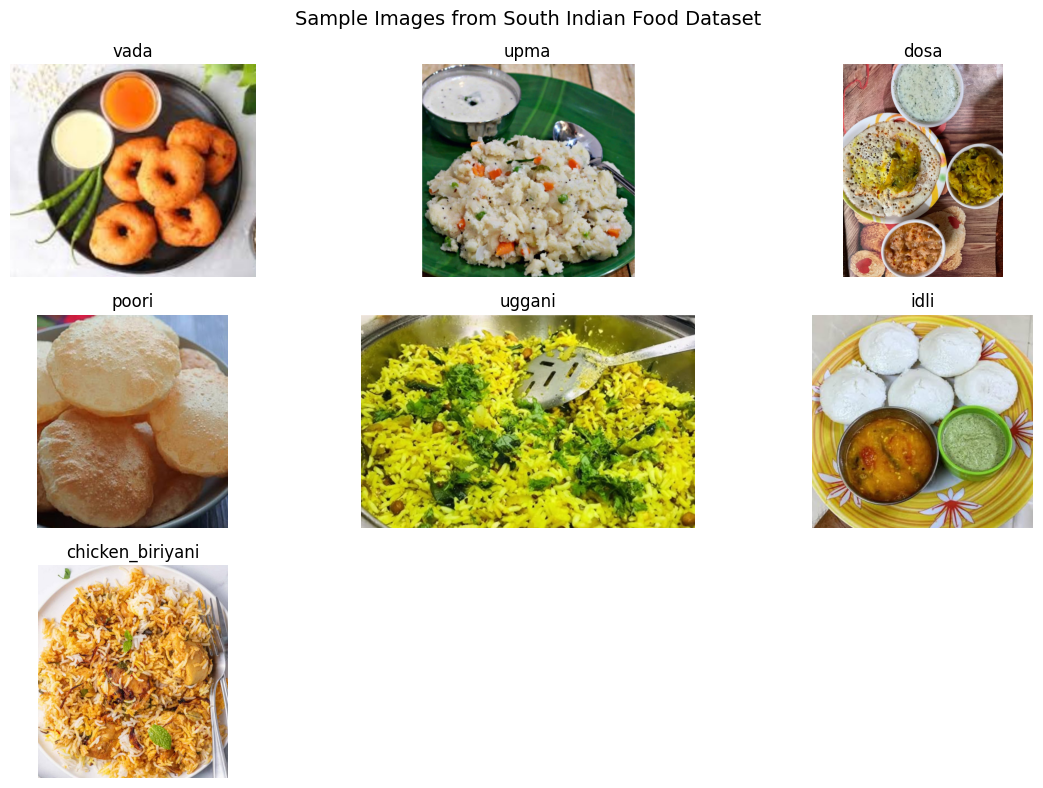

In [34]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12,8))

classes = os.listdir(raw_dir)

for i, cls in enumerate(classes):
    img_path = os.path.join(raw_dir, cls, random.choice(os.listdir(os.path.join(raw_dir, cls))))
    img = plt.imread(img_path)

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample Images from South Indian Food Dataset", fontsize=14)
plt.tight_layout()
plt.savefig(paper_img_dir + "/dataset_samples.png", dpi=300)
plt.show()


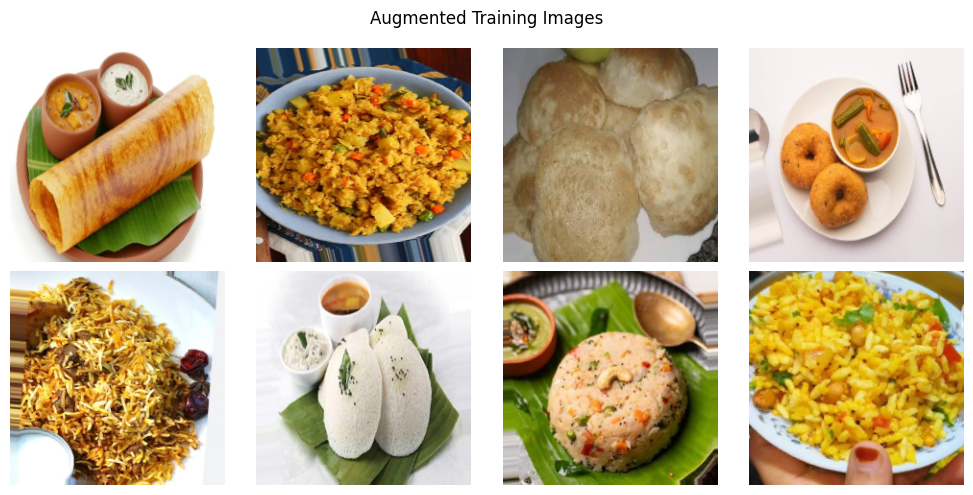

In [35]:
x, y = next(train_data)

plt.figure(figsize=(10,5)) # Adjusted figure size for a wider layout
for i in range(8): # Changed range to 8 to match 2x4 grid capacity
    plt.subplot(2,4,i+1) # Changed subplot grid to 2 rows and 4 columns
    plt.imshow(x[i])
    plt.axis("off")

plt.suptitle("Augmented Training Images")
plt.tight_layout()
plt.savefig(paper_img_dir + "/data_augmentation.png", dpi=300)
plt.show()

# Task
Compute and plot the confusion matrix for the trained model on the test data.

## Predict on test data

### Subtask:
Use the trained model to make predictions on the `test_data`.


**Reasoning**:
The subtask requires using the trained model to make predictions on the `test_data`. I will use the `model.predict()` method for this purpose.



In [ ]:
predictions = model.predict(test_data)
print(predictions.shape)
print(predictions[0])

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 628ms/step
(136, 7)
[6.6295439e-01 3.4287342e-07 1.7575916e-06 8.3285246e-05 3.3684170e-01
 1.1847248e-04 1.4068009e-07]


**Reasoning**:
Now that the model predictions are available, I need to extract the true labels from the `test_data` to compare them with the predictions and compute the confusion matrix. The `test_data.classes` attribute will provide the integer labels for each image in the test set.



# Task
Compute and plot the confusion matrix for the trained model on the test data.

## Compute confusion matrix

### Subtask:
Calculate the confusion matrix using `sklearn.metrics.confusion_matrix`.


## Summary:

### Data Analysis Key Findings
The provided solving process describes the initiation of a subtask to compute the confusion matrix, including adding a text cell explaining this step. However, the process does not contain the actual execution of the confusion matrix calculation or its results. Therefore, no data analysis key findings can be reported at this stage.

### Insights or Next Steps
*   The immediate next step is to execute the planned subtask: calculate the confusion matrix using `sklearn.metrics.confusion_matrix` for the trained model on the test data.
*   After calculating, the confusion matrix should be plotted to visually analyze the model's performance, specifically identifying true positives, true negatives, false positives, and false negatives for each class.


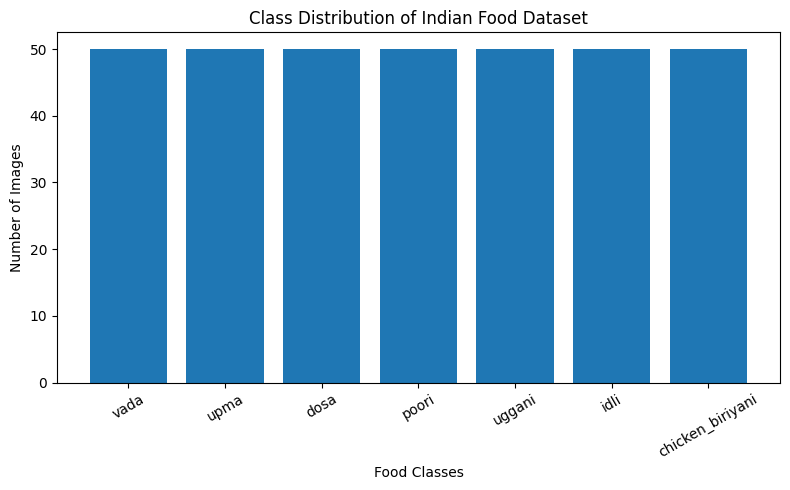

In [36]:
class_names = []
image_counts = []

for cls in classes:
    count = len(os.listdir(os.path.join(raw_dir, cls)))
    class_names.append(cls)
    image_counts.append(count)

plt.figure(figsize=(8,5))
plt.bar(class_names, image_counts)
plt.xlabel("Food Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution of Indian Food Dataset")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(paper_img_dir + "/fig2_class_distribution.png", dpi=300)
plt.show()


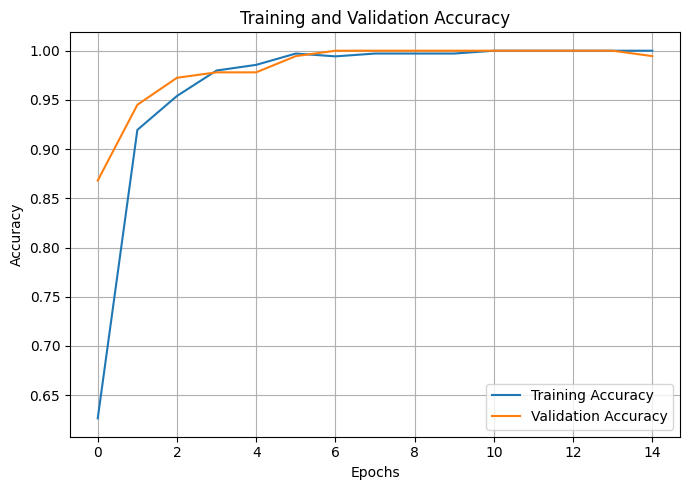

In [73]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(paper_img_dir + "/fig3_accuracy_curve.png", dpi=300)
plt.show()


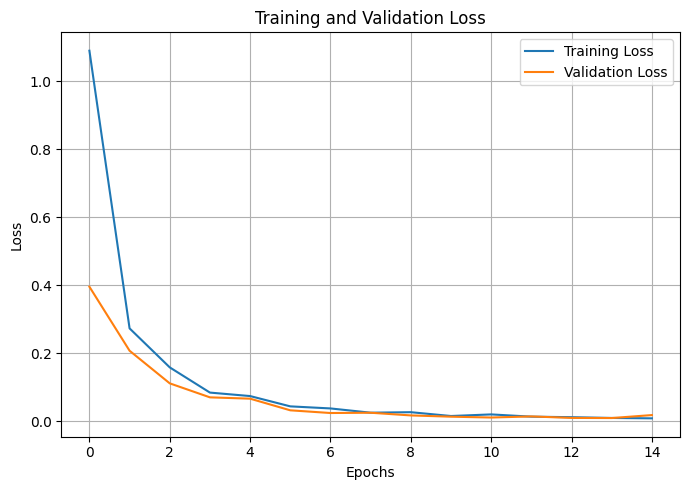

In [74]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(paper_img_dir + "/fig4_loss_curve.png", dpi=300)
plt.show()


In [75]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 567ms/step


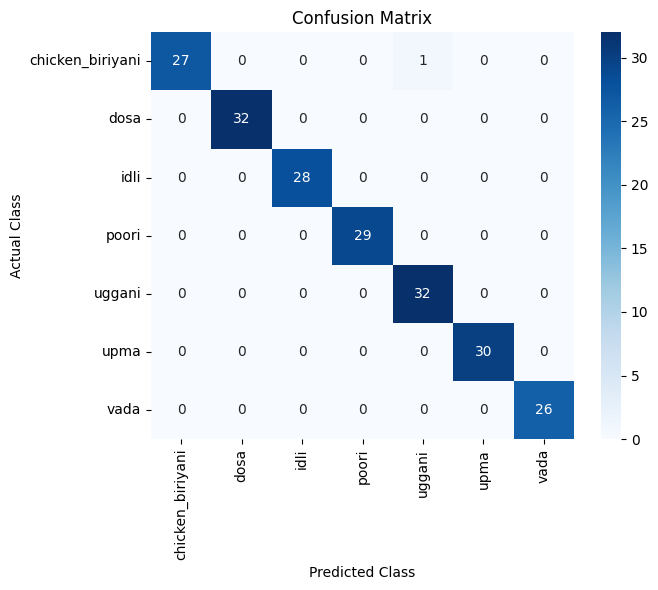

In [76]:
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=train_data.class_indices.keys(),
    yticklabels=train_data.class_indices.keys()
)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(paper_img_dir + "/fig5_confusion_matrix.png", dpi=300)
plt.show()
